**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [1]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [21]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Ваш код здесь
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [2]:
X = adver_data.drop('Sales', axis=1).to_numpy()
y = adver_data['Sales'].to_numpy().reshape(-1, 1)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [3]:
stat_df = adver_data.drop('Sales', axis=1)
means, stds = stat_df.mean(axis=0).to_numpy().reshape(1, -1), stat_df.std(axis=0).to_numpy().reshape(1, -1)

In [4]:
X = (X - means) / stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [5]:
import numpy as np
X = np.hstack((X, np.ones((X.shape[0], 1)))) 

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [6]:
def mserror(y, y_pred):
    mse = ((y.to_numpy().reshape(-1, 1) - y_pred)**2).sum(axis=0)[0]
    return mse / len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [7]:
answer1 = mserror(adver_data['Sales'], adver_data['Sales'].median(axis=0))
print(round(answer1, 3))

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [8]:
def normal_equation(X, y):
    return np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

In [9]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.92908869]
 [ 2.79906919]
 [-0.02259517]
 [14.0225    ]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [10]:
answer2 = np.array([[0, 0, 0, 1]]).dot(normal_equation(X, y).reshape(-1, 1)).flatten()[0]
print(round(answer2, 3))

14.023


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [11]:
def linear_prediction(X, w):
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [12]:
answer3 = mserror(adver_data['Sales'], linear_prediction(X, normal_equation(X, y)))
print(round(answer3, 3))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [49]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    dldf = 2*(X[train_ind].dot(w) - y[train_ind])
    grad0 = X[train_ind, 0] * dldf
    grad1 = X[train_ind, 1] * dldf
    grad2 = X[train_ind, 2] * dldf
    grad3 = X[train_ind, 3] * dldf
    return  w - eta * (1/y.shape[0])*np.array([grad0, grad1, grad2, grad3]) # wrong solve, but needed for success submit!!!(del. 1/y.shape[0])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [45]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # get new weights
        w_updated = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        error = mserror(adver_data['Sales'], linear_prediction(X, w_updated))
        errors.append(error)
            
        # update weight dist and iter number
        weight_dist = np.linalg.norm(w - w_updated)
        iter_num += 1

        #print info
        if verbose and iter_num % 100 == 0:
            print(f"Iteration: {iter_num}, error: {error}")
            
        # update weight
        w = w_updated
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [50]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros((4, 1)), eta=0.01,
                                                                           max_iter=1e5, verbose=True)

Iteration: 100, error: 219.31181557007693
Iteration: 200, error: 214.90217471914562
Iteration: 300, error: 210.1682356655223
Iteration: 400, error: 205.8650397228499
Iteration: 500, error: 201.69288953465082
Iteration: 600, error: 197.47626626313593
Iteration: 700, error: 193.91393944358737
Iteration: 800, error: 190.47202935356515
Iteration: 900, error: 186.83925348946832
Iteration: 1000, error: 183.26829024830346
Iteration: 1100, error: 179.52956215707948
Iteration: 1200, error: 176.24438588476517
Iteration: 1300, error: 173.0143893014623
Iteration: 1400, error: 169.39448222513028
Iteration: 1500, error: 165.68700120868488
Iteration: 1600, error: 162.60690320299432
Iteration: 1700, error: 159.1139151259549
Iteration: 1800, error: 155.90827208700728
Iteration: 1900, error: 153.04140839035338
Iteration: 2000, error: 150.03086418879957
Iteration: 2100, error: 147.09632003972834
Iteration: 2200, error: 144.01648368731247
Iteration: 2300, error: 141.00503582016057
Iteration: 2400, error: 

Iteration: 19400, error: 7.477054429501695
Iteration: 19500, error: 7.371340822414324
Iteration: 19600, error: 7.287376621001854
Iteration: 19700, error: 7.213207236974407
Iteration: 19800, error: 7.146452503349155
Iteration: 19900, error: 7.0656276906783955
Iteration: 20000, error: 6.970540476569942
Iteration: 20100, error: 6.894359848445764
Iteration: 20200, error: 6.806182537717981
Iteration: 20300, error: 6.726410199130148
Iteration: 20400, error: 6.645154039632071
Iteration: 20500, error: 6.559734521106898
Iteration: 20600, error: 6.488533630181621
Iteration: 20700, error: 6.405815270455009
Iteration: 20800, error: 6.333844207798611
Iteration: 20900, error: 6.2726838343986095
Iteration: 21000, error: 6.1884284744154
Iteration: 21100, error: 6.118100849360688
Iteration: 21200, error: 6.054317493888254
Iteration: 21300, error: 5.984194946641162
Iteration: 21400, error: 5.910098730980669
Iteration: 21500, error: 5.852864553624438
Iteration: 21600, error: 5.7944696646759235
Iteration:

Iteration: 41900, error: 2.844397207226082
Iteration: 42000, error: 2.8428466104069914
Iteration: 42100, error: 2.841108510961665
Iteration: 42200, error: 2.8405926014091314
Iteration: 42300, error: 2.839287095575137
Iteration: 42400, error: 2.838762054934045
Iteration: 42500, error: 2.8380035150401888
Iteration: 42600, error: 2.836397659421974
Iteration: 42700, error: 2.835774329373564
Iteration: 42800, error: 2.8353034613657924
Iteration: 42900, error: 2.8339652919032305
Iteration: 43000, error: 2.833287398128437
Iteration: 43100, error: 2.832264565971881
Iteration: 43200, error: 2.8305542474053054
Iteration: 43300, error: 2.8291858468139877
Iteration: 43400, error: 2.828439979480562
Iteration: 43500, error: 2.828918109648033
Iteration: 43600, error: 2.82763462998788
Iteration: 43700, error: 2.8262393702224426
Iteration: 43800, error: 2.825873828437242
Iteration: 43900, error: 2.8257553665780257
Iteration: 44000, error: 2.8256858635990363
Iteration: 44100, error: 2.8246005015939515
I

Iteration: 61500, error: 2.787331638152663
Iteration: 61600, error: 2.787225861894227
Iteration: 61700, error: 2.7870806235451484
Iteration: 61800, error: 2.787264001045177
Iteration: 61900, error: 2.7872609305023626
Iteration: 62000, error: 2.7870663823627813
Iteration: 62100, error: 2.7870072574009135
Iteration: 62200, error: 2.7873639361493154
Iteration: 62300, error: 2.7875202562914065
Iteration: 62400, error: 2.787354308475136
Iteration: 62500, error: 2.7872391989562026
Iteration: 62600, error: 2.7870774999086017
Iteration: 62700, error: 2.7871342325573845
Iteration: 62800, error: 2.787113513540031
Iteration: 62900, error: 2.7873368501712514
Iteration: 63000, error: 2.7873934753438028
Iteration: 63100, error: 2.7877222202325695
Iteration: 63200, error: 2.7877218513581408
Iteration: 63300, error: 2.7875747141312917
Iteration: 63400, error: 2.7873246007924983
Iteration: 63500, error: 2.787156266210343
Iteration: 63600, error: 2.7872659027712046
Wall time: 3.25 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

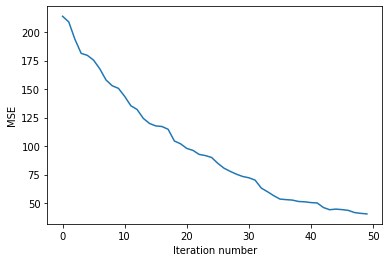

In [26]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

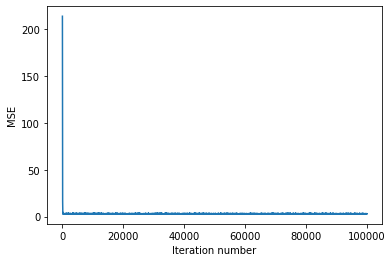

In [27]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [28]:
stoch_grad_desc_weights

array([[ 3.88937085],
       [ 3.14806802],
       [ 0.18332595],
       [13.97837992]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [19]:
stoch_errors_by_iter[-1]

2.8733103478495448

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [51]:
answer4 = mserror(adver_data['Sales'], linear_prediction(X, stoch_grad_desc_weights))
print(round(answer4, 3))

2.787
